In [2]:
from matplotlib import pyplot as plt
import numpy as np
import analysisFunctions as aF
from scipy import signal
from scipy.ndimage import gaussian_filter, median_filter

## Opening and sorting data

In [3]:
path1 = r"C:\Users\gabri\Desktop\1_1500_av.csv"
path2 = r"C:\Users\gabri\Desktop\1501_end_av.csv"
data1 = np.loadtxt(path1, skiprows=1, delimiter=',')
data2 = np.loadtxt(path2, skiprows=1, delimiter=',')
data = np.concatenate((data1[1:, 1], data2[:, 1]))  # on skip le tout premier frame, noir

FPS = 40
nChannels = 4
endTime = (1/FPS) * data.shape[0]
timestamp = np.linspace(0, int(endTime), int(data.shape[0]/nChannels))


violet = data[0::4]
blue   = data[1::4]
green  = data[2::4]
red    = data[3::4]

violet[0:5] = np.mean(violet[5:])


## Plotting raw data

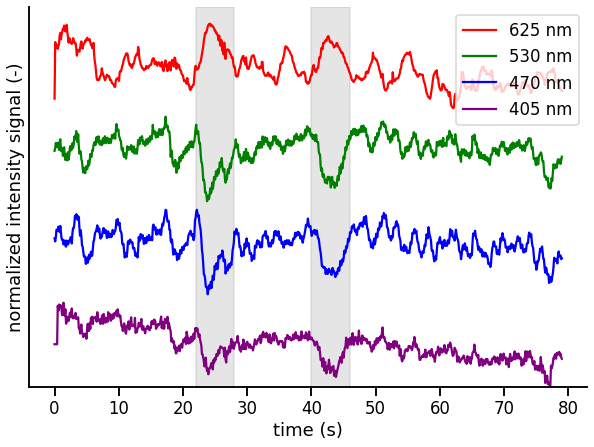

In [13]:
import seaborn as sns
# fig = plt.figure(figsize=(10, 7))
sns.set_context('talk')


mod_blue = (blue - np.min(blue))/np.max(blue - np.min(blue))
mod_green = (green - np.min(green))/np.max(green - np.min(green))
mod_violet = (violet - np.min(violet))/np.max(violet - np.min(violet))
mod_red = (red - np.min(red))/np.max(red - np.min(red))

fig = plt.figure(figsize=(10, 7))
plt.plot(timestamp, mod_red+3.3, color='red', label='625 nm')
plt.plot(timestamp, mod_green+2.2, color='green', label='530 nm')
plt.plot(timestamp, mod_blue+1.1, color='blue', label='470 nm')
plt.plot(timestamp, mod_violet, color='purple', label='405 nm')

plt.fill_between((22, 28), (0, 0), (4.5, 4.5), color='gray', alpha=0.2)
plt.fill_between((40, 46), (0, 0), (4.5, 4.5), color='gray', alpha=0.2)

plt.legend()
plt.ylim(0, 4.5)
plt.xlabel("time (s)")
plt.ylabel("normalized intensity signal (-)")
ax = plt.gca()
ax.set_yticklabels([])
ax.set_yticks([])
sns.despine()
# plt.savefig("prelim_results.png", dpi=600)



## Comparaison bleu, vert et mauve

C:\Users\gabri\AppData\Local\Temp\ipykernel_12180\3880905573.py:14: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(timestamp, median_filter(mod_blue/mod_green, size=3)-0.5, color='black', label='hemodynamic correction')


[]

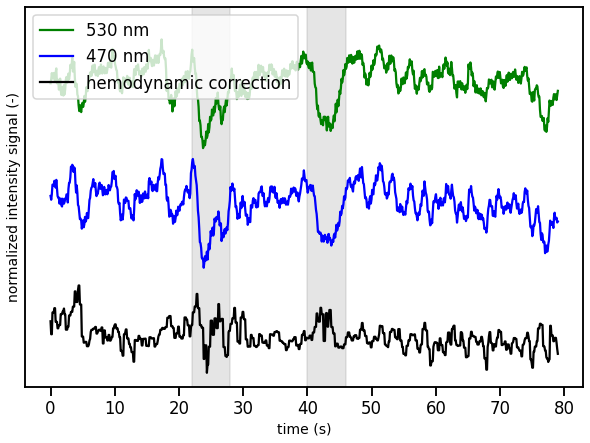

In [15]:
import seaborn as sns
fig = plt.figure(figsize=(10, 7))
sns.set_context('talk')
# plt.plot(timestamp, mod_red+3.3, color='red', label='625 nm')
plt.plot(timestamp, mod_green+2.2, color='green', label='530 nm')
plt.plot(timestamp, mod_blue+1.1, color='blue', label='470 nm')
# plt.plot(timestamp, mod_violet, color='purple', label='405 nm')

plt.fill_between((22, 28), (0, 0), (4.5, 4.5), color='gray', alpha=0.2)
plt.fill_between((40, 46), (0, 0), (4.5, 4.5), color='gray', alpha=0.2)

# plt.plot(timestamp, mod_blue - mod_green, color='deepskyblue', linestyle='--', label="blue-green")
# plt.plot(timestamp, mod_blue - mod_green - mod_violet, color='orange', label='bleu-vert-mauve')
plt.plot(timestamp, median_filter(mod_blue/mod_green, size=3)-0.5, color='black', label='hemodynamic correction')
# plt.plot(timestamp, (mod_blue/mod_violet)+4, color='violet', label='bleu/mauve')
plt.legend()
plt.ylim(0, 3.5)
plt.xlabel("time (s)", fontsize=14)
plt.ylabel("normalized intensity signal (-)", fontsize=14)
ax = plt.gca()
ax.set_yticklabels([])
ax.set_yticks([])
# plt.savefig("prelim_results.png", dpi=600)

## Filtering

C:\Users\gabri\AppData\Local\Temp\ipykernel_17492\3958520692.py:1: RuntimeWarning: divide by zero encountered in true_divide
  hemo_corr = mod_blue/mod_green


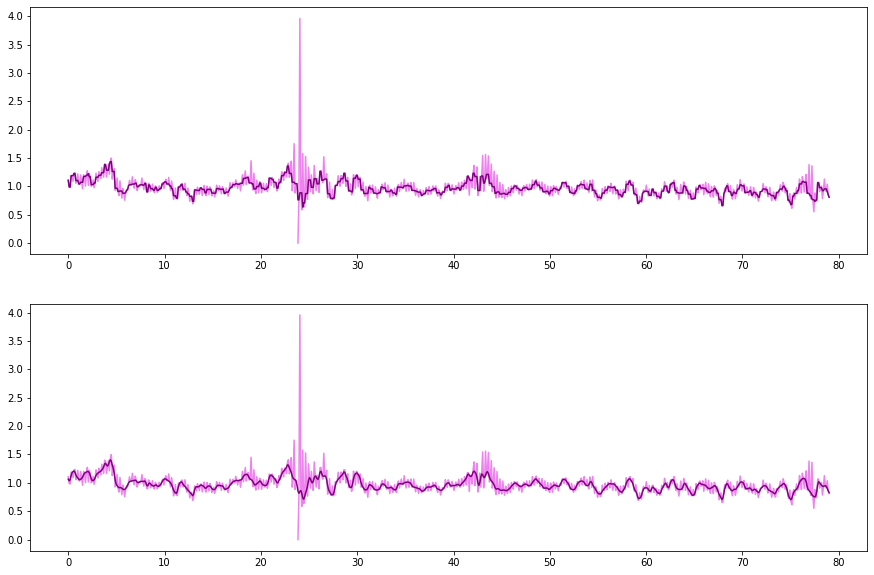

In [6]:
hemo_corr = mod_blue/mod_green

# sos = signal.butter(4, 0.05, btype='high', output='sos', fs=40)
# f_hemo_corr = signal.sosfilt(sos, hemo_corr)

fm_hemo_corr = median_filter(hemo_corr, size=3)
fg_hemo_corr = gaussian_filter(fm_hemo_corr, sigma=1)


fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
plt.plot(timestamp, fm_hemo_corr, color='purple')
# plt.plot(timestamp, mod_red, color='red', label='625 nm')

ax2 = plt.subplot(2, 1, 2)
# plt.plot(timestamp, green, color='green', label='530 nm')
# plt.plot(timestamp, red, color='red', label='625 nm')
plt.plot(timestamp, hemo_corr, color='violet', label='530 nm')
plt.plot(timestamp, fg_hemo_corr, color='purple')
# plt.plot(timestamp, f_green)

### Filtre nécessaire?

## Réflectance

In [34]:
# %matplotlib qt 
%matplotlib inline
m_HbR, m_HbO = aF.oxygenation(mod_red, mod_green)
HbR, HbO = aF.oxygenation(red, green)

fig = plt.figure(figsize=(15, 10))

ax1 = plt.subplot(2, 1, 1)
# ax1.plot(timestamp, HbO, 'r')
# ax1.plot(timestamp, HbR, 'b')

plt.plot(timestamp, mod_green, color='green', label='530 nm')
plt.plot(timestamp, mod_red, color='red', label='625 nm')
# plt.xlim(60, 65)

fm_HbO = median_filter(m_HbO, size=5)
fm_HbR = median_filter(m_HbR, size=5)

ax2 = plt.subplot(2, 1, 2)
ax2.plot(timestamp, m_HbO, 'r')
ax2.plot(timestamp, m_HbR, 'b')
ax2.plot(timestamp, fm_HbO, color="salmon")
ax2.plot(timestamp, fm_HbR, color="deepskyblue")

# plt.xlim(20, 25)
# print(m_HbO)


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed